In [1]:
#under this we will analye month wise FTAs in India table 5

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
df = pd.read_excel("Data from 2019-2022 excel files (copy)/Tourism-Statistics-for-year-2022.xlsx" ,sheet_name = "Table 5", skiprows = 2)

In [52]:
#converting the right columns

df.columns = ["Month","2020","2021","2022","NaN","NaN","%share"]

In [53]:
#droping unwanted columns and rows 

df = df.drop("NaN", axis = 1) 
df = df.dropna()

In [54]:
#droping the total row 

df = df[~df["Month"].str.contains("Total")]

In [55]:
#reducing to thousand and rounding off 

df.loc[:,"2020"] = np.round(df["2020"]/1000,2)
df.loc[:,"2021"] = np.round(df["2021"]/1000,2)
df.loc[:,"2022"] = np.round(df["2022"]/1000,2)

In [61]:
#extraction for bar plot 

month = df["Month"]
m_2020 = df["2020"]
m_2021 = df["2021"]
m_2022 = df["2022"]
share_22 = df["%share"]

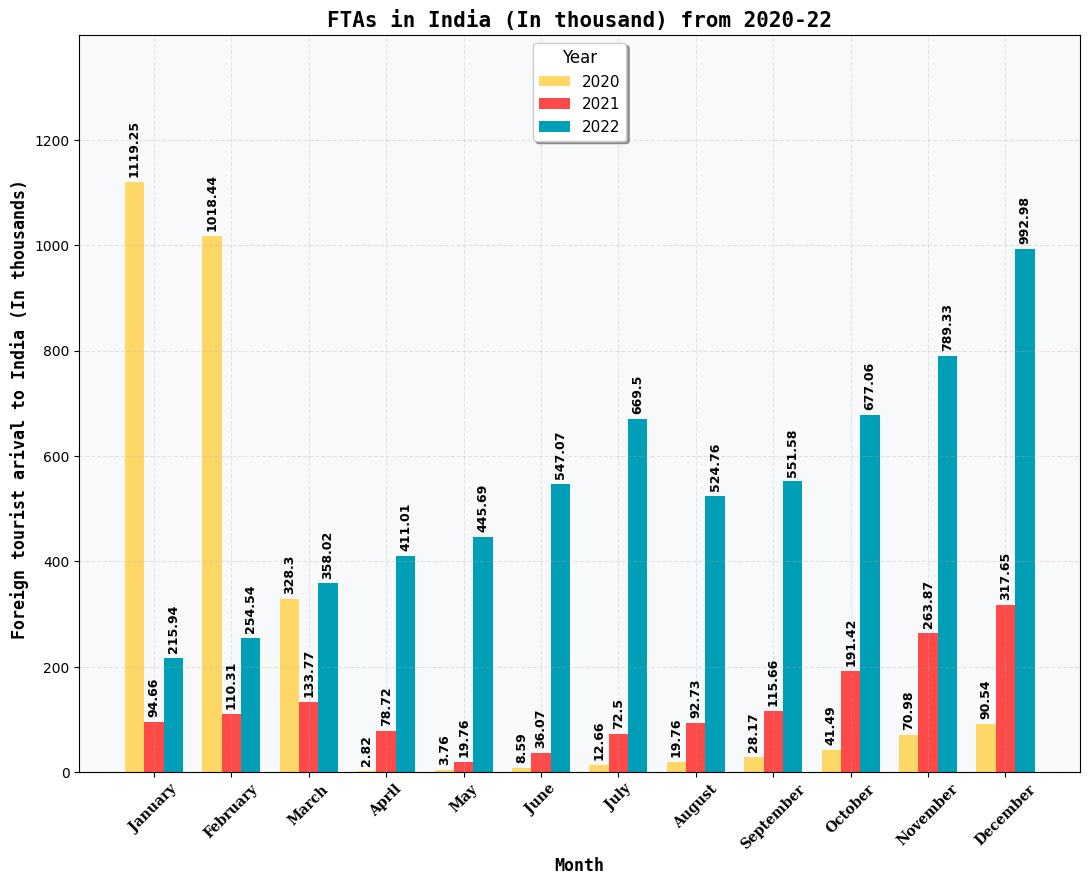

In [63]:
#plotting the graph 

plt.figure(figsize = (11,9))
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']

x = np.arange(len(df))
width = 0.25

bars1 = plt.bar(x-width, m_2020, width = width,color = "#FED766",label = "2020") 
bars2 = plt.bar(x, m_2021, width = width,color = "#FE4A49", label = "2021") 
bars3 = plt.bar(x+width, m_2022, width = width,color = "#009FB7", label = "2022") 

# Add value labels on top of each bar
def add_value_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{value}', ha='center', va='bottom', 
                fontsize=9, fontweight='bold', rotation=90)

# Apply value labels to all bar groups
add_value_labels(bars1, m_2020)
add_value_labels(bars2, m_2021)
add_value_labels(bars3, m_2022)

plt.xticks(x, month,fontfamily = "serif", fontsize = 10, fontweight = 'bold',rotation = 45)
plt.title("FTAs in India (In thousand) from 2020-22",fontfamily = "monospace", fontsize = 15, fontweight = 'bold')
plt.xlabel("Month",fontfamily = "monospace", fontsize = 12, fontweight = 'bold')
plt.ylabel("Foreign tourist arival to India (In thousands) ",fontfamily = "monospace", fontsize = 12, fontweight = 'bold')

plt.legend(loc='upper center', frameon=True, fancybox=True, shadow=True, 
           fontsize=11, title="Year", title_fontsize=12)


plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Set y-axis limits to accommodate labels
plt.ylim(0, max(max(m_2020), max(m_2021), max(m_2022)) * 1.25)

# Add background color
plt.gca().set_facecolor('#f8f9fa')

#saving the plot 

plt.savefig('Monthly FTAs (Foreign Tourist Arrivals) in India (2020-2022).png', 
            dpi=300,                    # High resolution
            bbox_inches='tight',        # Remove extra whitespace
            facecolor='white',          # White background
            edgecolor='none',           # No border
            pad_inches=0.1)             # Small padding

In [58]:
df

,Month,2020,2021,2022,%share
0,January,1119.25,94.66,215.94,3.35
1,February,1018.44,110.31,254.54,3.95
2,March,328.30,133.77,358.02,5.56
3,April,2.82,78.72,411.01,6.38
4,May,3.76,19.76,445.69,6.92
5,June,8.59,36.07,547.07,8.50
6,July,12.66,72.50,669.50,10.40
7,August,19.76,92.73,524.76,8.15
8,September,28.17,115.66,551.58,8.57
9,October,41.49,191.42,677.06,10.52
